**Linear Regression model with regularization**
* Linear egression with one variable (gradient Descent)
* Linear egression with one variable (Normal Equation)
* Linear Regression model from Sklearn
* Linear Regression with more than 1 variable (gradient Descent)
* Linear Regression model with more than 1 variable from Sklearn
* Usefull web-sites

In [296]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import os

In [297]:
#R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known 
#as the coefficient of determination, or the coefficient of multiple determination for multiple regression.
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)

In [298]:
# 1 identity matrix 5х5
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [299]:
#linear regression 1-feature
os.getcwd()
os.chdir('/Users/apple/Documents/анализ данных')

In [300]:
columnnames = ["population in 10,000s","profit in $10,000s"]
data_train = pd.read_csv("Coursera training sets/ex1data1.txt", names = columnnames, header = None)

In [301]:
data_train.head(5)

,"population in 10,000s","profit in $10,000s"
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [302]:
data_train.describe()

,"population in 10,000s","profit in $10,000s"
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


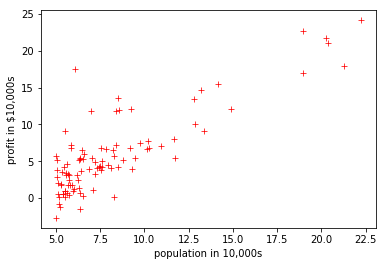

In [303]:
plot_train = sns.scatterplot(x = data_train["population in 10,000s"],y = data_train["profit in $10,000s"], 
                             sizes = (20,200), marker = "+", color = "r")

In [304]:
#Find our Teta by using Gradient Desent.
X = data_train["population in 10,000s"].to_numpy()

In [305]:
X

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [306]:
y = data_train["profit in $10,000s"].to_numpy()

In [307]:
np.shape(X)

(97,)

In [308]:
# Building the model Mind! we don't have 1 in matrix
#y = mX+c
m = 0
c = 0
lambda_ = 0.1 #regularization paramentr

L = 0.01  # The learning Rate
epochs = 1500  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X
f = 1 # number of features

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
    m = m*(1 - L*(lambda_/f)) - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1.1872919991101463 -3.84581456312829


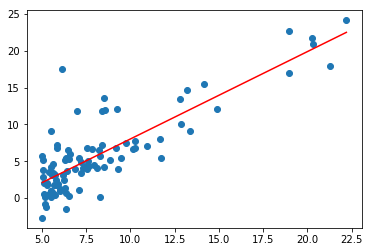

In [309]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X,y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [310]:
Teta = np.array([m,c])

In [311]:
predict1 = np.array([3.5,1])
predict2 = np.array([7,1])

In [312]:
res_predict1 = np.dot(predict1,Teta)
res_predict2 = np.dot(predict2,Teta)

In [313]:
print("profit in $10,000s: ", res_predict1*10000, "\n"
     "profit in $10,000s: ", res_predict2*10000)

profit in $10,000s:  3097.074337572221 
profit in $10,000s:  44652.29430642735


In [314]:
r2(y,Y_pred)

0.5714237373555607

**Try Normal Equation**

In [315]:
X = np.c_[np.ones(len(X)),X]

In [316]:
np.shape(X)

(97, 2)

In [317]:
n = np.shape(X)[1] #cols 
lambda_ = 0.1 #regularization parameter
np.identity(n)

array([[1., 0.],
       [0., 1.]])

In [318]:
regular = lambda_*L
TetaIndex = np.linalg.inv(X.T.dot(X)+lambda_*np.identity(n)).dot(X.T.dot(y))

In [319]:
TetaIndex

array([-3.87317471,  1.19075256])

In [320]:
y_pred = X.dot(TetaIndex)
r2(y,y_pred)

0.5739304535456153

**Linear  Regression from Sklearn**

In [321]:
model = LinearRegression()
model.fit(X, y)
parameters = model.coef_
predicted = model.predict(X)
r2 (predicted_,y)


0.7020315537841397

**Multiple Regression Model**

In [322]:
columnnames = ["size (feet^2)", "bedrooms", "price"]
data_multi = pd.read_csv("Coursera training sets/ex1data2.txt", names = columnnames, header = None)

In [323]:
data_multi.head(3)

,size (feet^2),bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000


In [324]:
data_multi.describe()

,size (feet^2),bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


/Users/apple/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


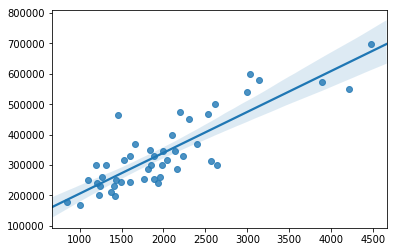

In [325]:
sns.regplot(data_multi["size (feet^2)"].to_numpy(), data_multi["price"].to_numpy())

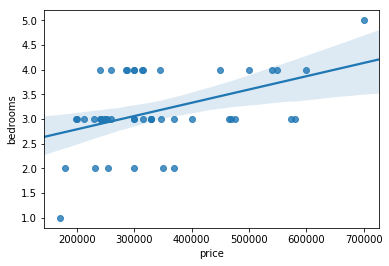

In [326]:
sns.regplot(data_multi["price"], data_multi["bedrooms"])

In [327]:
X = data_multi.iloc[:,[0,1]]
Y = data_multi.iloc[:,2]

In [328]:
sc = StandardScaler()
X = sc.fit_transform(X)
#normilize using the following formula z=(x-mean)/std

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [329]:
np.shape(X)

(47, 2)

In [330]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

* X: Feature Matrix
* Y: an array of target values
* B: initial value of theta
* alpha: learning rate
* iterations: max no. of iterations for algorithm
* lambda_ - regularization parametr
* f - num of features

In [331]:
iterations=10
cost_history = [0] * iterations
cost_history

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [332]:
def batch_gradient_descent(X, Y, B, alpha, iterations, lambda_, f):
    cost_history = [0] * iterations
    m = len(Y)
 
    for iteration in range(iterations):
        #print(iteration)
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        #gradient = X.T.dot(loss) / m
        #X = np.transpose(X)
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B*(1 - alpha*(lambda_/f)) - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
 
    return B, cost_history

In [333]:
B = np.zeros(X.shape[1]+1)
alpha = 0.005
iter_ = 1500
lambda_ = 0.1
B

array([0., 0., 0.])

In [334]:
m = 30
f = 2
#T matrix is mormalized, but not values we are to predict and to train on!!!
X_train = X[:m,:f]
#Here comes ones!!!!
X_train = np.c_[np.ones(len(X_train),dtype="int64"),X_train]
y_train = Y[:m]
X_test = X[m:,:f]
X_test = np.c_[np.ones(len(X_test),dtype="int64"),X_test]
y_test = Y[m:]

here, m = total no. of samples those will be included in training set that will be used to train the model the samples left will be assigned to testing set(training = 7000 , testing = 2568)
and, f = no. of features (first 2 features)

Examples

np.c_[np.array([1,2,3]), np.array([4,5,6])]
array([[1, 4],
       [2, 5],
       [3, 6]])
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
array([[1, 2, 3, ..., 4, 5, 6]])

In [335]:
X_train

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

In [367]:
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_, lambda_, f)
#newB - list of indexes for the equation (Tetas)

In [368]:
print(newB)

[315434.332176    96865.19918637  17052.26499906]


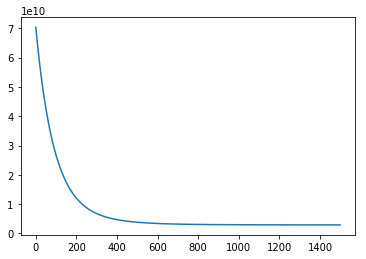

In [371]:
plt.plot(cost_history)

In [340]:
y_pred = X_test.dot(newB)

In [341]:
r2(y_pred,y_test)

0.67188723146534

In [342]:
#make prediction of 40 item
anw = X_test[10].dot(newB)
print ("Check if the right item", X_test[10], "\n", "Price", anw)

Check if the right item [ 1.         -0.42823675 -1.5543919 ] 
 Price 263880.6073807446


In [343]:
data_multi.loc[40]

size (feet^2)      1664
bedrooms              2
price            368500
Name: 40, dtype: int64

In [344]:
y_test[40]

368500

In [345]:
#make prediction of 33 item
anw = X_test[3].dot(newB)
print ("Check if the right item", X_test[3], "\n", "Price", anw)

Check if the right item [ 1.          1.44532608 -0.22609337] 
 Price 474029.34193539293


In [346]:
data_multi.loc[33]

size (feet^2)      3137
bedrooms              3
price            579900
Name: 33, dtype: int64

In [347]:
y_test[33]

579900

**Linear Regression from Sklearn**

In [348]:
columnnames = ["size (feet^2)", "bedrooms", "price"]
data_multi = pd.read_csv("Coursera training sets/ex1data2.txt", names = columnnames, header = None)

In [349]:
X = data_multi.iloc[:,[0,1]]
X = np.c_[np.ones(len(X)),X]
y = data_multi.iloc[:,-1]

In [350]:
model.fit(X,y)
parameters = model.coef_
predicted = model.predict(X)
y = y.to_numpy()
r2 (predicted,y)

0.7329450180289142

In [351]:
parameters

array([    0.        ,   139.21067402, -8738.01911233])

**Try multi with one variable regression, will it make the model better?**

In [352]:
X = data_multi.iloc[:,0].to_numpy()
Y = data_multi.iloc[:,2].to_numpy()
X = np.reshape(X,(-1,1))

sc = StandardScaler()
X = sc.fit_transform(X)

#X = np.c_[np.ones(len(X),dtype="int64"),X]

#m = 30
#f = 1

#X_train = X[:m]
#X_train = np.c_[np.ones(len(X_train),dtype="int64"),X_train]
#X_test = X[m:]
#X_test = np.c_[np.ones(len(X_test),dtype="int64"),X_test]
#y_train = Y[:m]
#y_test = Y[m:]
np.shape(X)
X = np.reshape(X,(47,))

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [353]:
# Building the model Mind! we don't have 1 in matrix
#y = mX+c
m = 0
c = 0
f = 1 #number of features
lambda_ = 0.1

L = 0.01  # The learning Rate
epochs = 1500  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m*(1-L*(lambda_/f)) - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

100727.74618363222 340412.6595744445


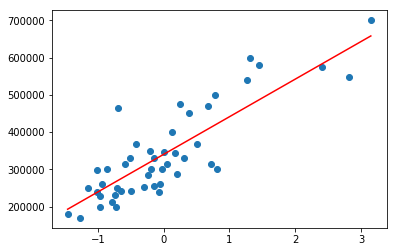

In [354]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X,Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [355]:
newB = np.array([m, c])
X = np.c_[X,np.ones(len(X))]

In [356]:
X

array([[ 1.31415422e-01,  1.00000000e+00],
       [-5.09640698e-01,  1.00000000e+00],
       [ 5.07908699e-01,  1.00000000e+00],
       [-7.43677059e-01,  1.00000000e+00],
       [ 1.27107075e+00,  1.00000000e+00],
       [-1.99450507e-02,  1.00000000e+00],
       [-5.93588523e-01,  1.00000000e+00],
       [-7.29685755e-01,  1.00000000e+00],
       [-7.89466782e-01,  1.00000000e+00],
       [-6.44465993e-01,  1.00000000e+00],
       [-7.71822042e-02,  1.00000000e+00],
       [-8.65999486e-04,  1.00000000e+00],
       [-1.40779041e-01,  1.00000000e+00],
       [ 3.15099326e+00,  1.00000000e+00],
       [-9.31923697e-01,  1.00000000e+00],
       [ 3.80715024e-01,  1.00000000e+00],
       [-8.65782986e-01,  1.00000000e+00],
       [-9.72625673e-01,  1.00000000e+00],
       [ 7.73743478e-01,  1.00000000e+00],
       [ 1.31050078e+00,  1.00000000e+00],
       [-2.97227261e-01,  1.00000000e+00],
       [-1.43322915e-01,  1.00000000e+00],
       [-5.04552951e-01,  1.00000000e+00],
       [-4.

In [357]:
y_pred = X.dot(newB)
y_pred

array([353649.8388484 , 289077.70074268, 391573.15805334, 265503.74556123,
       468444.75103633, 338403.63957344, 280621.82551455, 266913.05809925,
       260891.44998225, 275497.05264902, 332638.27009971, 340325.42939801,
       326232.30401779, 657805.10841777, 246542.08595876, 378761.22588951,
       253204.29068395, 242442.26766633, 418350.09627575, 472416.45000712,
       310473.62745628, 325976.06537452, 289590.17802923, 335456.89517575,
       582470.94729444, 225018.03992352, 270884.75707004, 407716.19257977,
       365949.29372567, 421937.43728162, 319698.21861424, 212206.10775969,
       345450.20226354, 485997.09810078, 316110.87760837, 268194.25131563,
       242826.62563125, 357237.17985427, 624109.7268269 , 361080.75950342,
       297277.33732753, 370817.82794793, 412969.08476694, 237829.97208735,
       193244.44815722, 321363.76979554, 238214.33005227])

In [358]:
Y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500])

In [359]:
r2(y_pred,Y)

0.7293461790232041

In [360]:
X[3]

array([-0.74367706,  1.        ])

In [361]:
#make prediction of 33 item
anw = X[3].dot(newB)
print ("Check if the right item", X[3], "\n", "Price", anw)

Check if the right item [-0.74367706  1.        ] 
 Price 265503.7455612293


In [362]:
data_multi.loc[3]

size (feet^2)      1416
bedrooms              2
price            232000
Name: 3, dtype: int64

Literature
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://medium.com/@pytholabs/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a